In [104]:
import praw
import pandas as pd
import numpy as np

import unicodedata
import string
import re
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import  SnowballStemmer
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df3k = pd.read_csv('data/all3000.csv', sep='!')

In [3]:
df10k = pd.read_csv('data/all10000.csv', sep='!')

In [4]:
df1k = pd.read_csv('data/askreddit1k.csv', sep='!')

In [5]:
df3k['score'].describe()

count      3000.000000
mean       3485.934667
std        8255.344167
min         133.000000
25%         511.750000
50%        1001.000000
75%        2553.250000
max      121082.000000
Name: score, dtype: float64

In [6]:
df10k['score'].describe()

count      9310.000000
mean       3318.684962
std        8730.847999
min          66.000000
25%         309.000000
50%         751.500000
75%        2198.250000
max      125630.000000
Name: score, dtype: float64

In [7]:
df1k['score'].describe()

count      999.000000
mean       339.075075
std       4236.093573
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max      70789.000000
Name: score, dtype: float64

In [8]:
df = df3k[df3k['score'] < 1700]
y1 = df['score'].tolist()

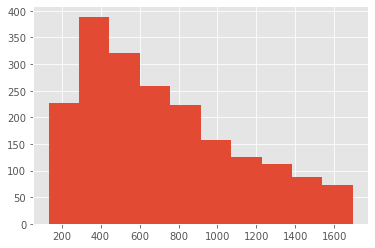

In [9]:
plt.hist(y1)
plt.show()

In [10]:
len(y1)

1974

In [11]:
df.describe()

,score,num_comments,upvote_ratio,created
count,1974.000000,1974.000000,1974.000000,1.974000e+03
mean,716.908815,39.535968,0.978207,1.606951e+09
std,390.546143,65.802793,0.024290,9.008587e+03
min,133.000000,0.000000,0.730000,1.606922e+09
25%,389.000000,10.000000,0.970000,1.606944e+09
50%,624.500000,21.000000,0.990000,1.606951e+09
75%,983.000000,44.750000,0.990000,1.606957e+09
max,1695.000000,1279.000000,1.000000,1.606971e+09


In [12]:
df1 = df10k[df10k['score'] < 600]
y2 = df1['score'].tolist()

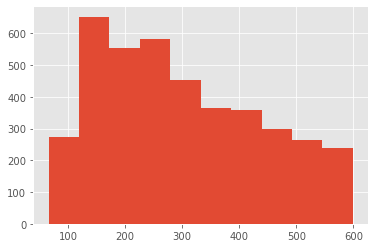

In [13]:
plt.hist(y2)
plt.show()

In [14]:
df1['score'].describe()

count    4039.000000
mean      299.387225
std       138.985727
min        66.000000
25%       180.500000
50%       276.000000
75%       406.000000
max       599.000000
Name: score, dtype: float64

In [15]:
df2 = df1k[df1k['score'] < 10]
y3 = df2['score'].tolist()

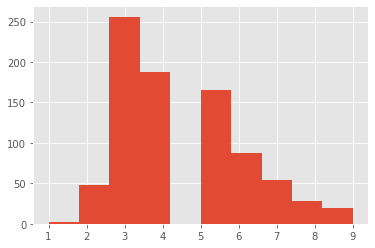

In [16]:
plt.hist(y3)
plt.show()

In [17]:
df2['score'].describe()

count    848.000000
mean       4.418632
std        1.635059
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: score, dtype: float64

In [18]:
corpus = df['title'].tolist()

In [19]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english')

In [20]:
X = vectorizer.fit_transform(corpus)

In [21]:
y = df['score'].tolist()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y1)

Predictive linear regression
regularized regression
decision rules???


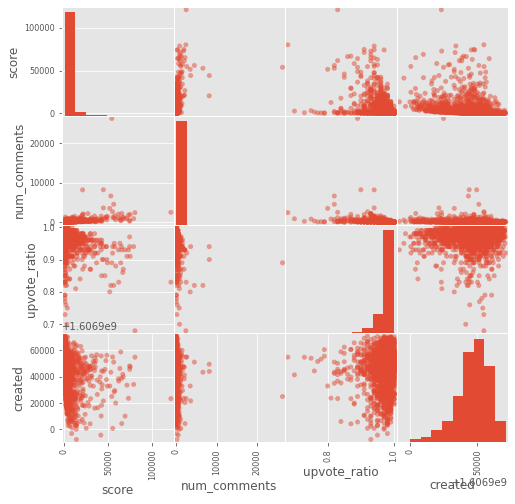

In [23]:
scatter_matrix(df3k, figsize=(8, 8), s=100)
plt.show()

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [25]:
reg = LinearRegression().fit(X_train, y_train)

In [26]:
#r**2
reg.score(X_test, y_test)

-0.4788739985437136

In [27]:
ridge = linear_model.Ridge(alpha=.5)

In [28]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [29]:
ridge.score(X_test, y_test)

-0.06912632257080853

In [30]:
lin = linear_model.Lasso(alpha=0.1)

In [31]:
lin.fit(X_train, y_train)

Lasso(alpha=0.1)

In [32]:
lin.score(X_test, y_test)

-0.1758692201332377

In [72]:
df1.describe()

,score,num_comments,upvote_ratio,created
count,4039.000000,4039.000000,4039.000000,4.039000e+03
mean,299.387225,25.024759,0.974273,1.606983e+09
std,138.985727,188.415901,0.032450,9.518113e+03
min,66.000000,0.000000,0.650000,1.606960e+09
25%,180.500000,6.000000,0.970000,1.606976e+09
50%,276.000000,12.000000,0.980000,1.606984e+09
75%,406.000000,23.000000,0.990000,1.606991e+09
max,599.000000,11538.000000,1.000000,1.607004e+09


In [34]:
corpus2 = df1['title'].tolist()
X1 = vectorizer.fit_transform(corpus2)
y1 = df1['score'].tolist()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)

In [56]:
len(vectorizer.get_feature_names())

13464

In [57]:
vectorizer.get_feature_names()

['00',
 '000',
 '000th',
 '007',
 '01',
 '02',
 '03',
 '04',
 '05',
 '07',
 '09',
 '096',
 '10',
 '100',
 '1000',
 '1000th',
 '100g',
 '100m',
 '100mxn',
 '100pounds',
 '101',
 '102',
 '103',
 '108',
 '1080p',
 '1098',
 '10am',
 '10gb',
 '10k',
 '10pm',
 '10th',
 '11',
 '110',
 '113',
 '11m',
 '11th',
 '12',
 '120',
 '1200x1280',
 '125',
 '126',
 '127',
 '1280x1920',
 '129',
 '12hrs',
 '12tb',
 '12th',
 '13',
 '130',
 '132lbs',
 '1350x1080',
 '136',
 '13th',
 '14',
 '140',
 '142lbs',
 '1440x2960',
 '148',
 '149',
 '1492',
 '15',
 '150',
 '1500',
 '155lbs',
 '1579',
 '159',
 '15km',
 '15yrs',
 '16',
 '160',
 '1638',
 '16d10',
 '17',
 '170',
 '1706',
 '170920',
 '172lbs',
 '174',
 '177',
 '1773',
 '1793',
 '1794',
 '18',
 '180',
 '1800s',
 '183',
 '1859',
 '1865',
 '1869',
 '1870',
 '1872',
 '1880',
 '1898',
 '19',
 '1903',
 '1905',
 '191116',
 '1915',
 '1918',
 '1920s',
 '1920x1080',
 '1920x2418',
 '1928',
 '1929',
 '192gb',
 '1933',
 '1939',
 '1940s',
 '1944',
 '1945',
 '1950',
 '1950s

In [35]:
reg = LinearRegression().fit(X_train1, y_train1)
reg.score(X_test1, y_test1)

-1.0054993694906118

In [36]:
ridge.fit(X_train1, y_train1)
ridge.score(X_test1, y_test1)

-0.06307457924060422

In [37]:
lin.fit(X_train1, y_train1)
lin.score(X_test1, y_test1)

-0.0006968121505988023

In [38]:
corpus3 = df2['title'].tolist()
X2 = vectorizer.fit_transform(corpus3)
y2 = df2['score'].tolist()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

In [39]:
reg = LinearRegression().fit(X_train2, y_train2)
reg.score(X_test2, y_test2)

-0.6108616883598226

In [40]:
ridge.fit(X_train2, y_train2)
ridge.score(X_test2, y_test2)

-0.1561430697434243

In [41]:
lin.fit(X_train2, y_train2)
lin.score(X_test2, y_test2)

-0.0001017747497686905

In [42]:
df10k

,title,score,id,subreddit,url,num_comments,body,subreddit_name_prefixed,upvote_ratio,created
0,I proudly served in the Gay Wars of '07,9855,k5q24b,MurderedByWords,https://i.redd.it/ye6ex004dw261.png,129,NaN,r/MurderedByWords,0.97,1.606997e+09
1,America would never oh never mind,32798,k5npff,WhitePeopleTwitter,https://i.redd.it/2hb11413ov261.jpg,486,NaN,r/WhitePeopleTwitter,0.94,1.606989e+09
2,Nicolas Cage walking down the street with his son,48816,k5n01o,pics,https://i.redd.it/q4l5albsgv261.jpg,1738,NaN,r/pics,0.90,1.606987e+09
3,Donald Trump’s surprise speech branded one of ...,22868,k5mtlr,politics,https://www.independent.co.uk/news/world/ameri...,1737,NaN,r/politics,0.93,1.606986e+09
4,The fact that they lit all the individual bran...,13393,k5o5tn,mildlyinteresting,https://i.redd.it/71dfqf1psv261.jpg,222,NaN,r/mildlyinteresting,0.98,1.606991e+09
...,...,...,...,...,...,...,...,...,...,...
9305,Level is increasing.,34154,k54dnp,memes,https://i.redd.it/g5jsfeu52q261.jpg,117,NaN,r/memes,0.96,1.606921e+09
9306,Reality can be whatever I want,75,k5r3dk,memes,https://i.redd.it/g6xazmropw261.jpg,6,NaN,r/memes,0.93,1.607002e+09
9307,Congrats to Elliot Page for coming out,259,k5jxhf,memes,https://i.redd.it/bb8m1qs0nu261.jpg,14,NaN,r/memes,0.95,1.606976e+09
9308,I mean it really would,86,k5qe8i,memes,https://i.redd.it/ubqudm9bhw261.jpg,6,NaN,r/memes,0.97,1.606999e+09


In [43]:
df10k.describe()

,score,num_comments,upvote_ratio,created
count,9310.000000,9310.000000,9310.000000,9.310000e+03
mean,3318.684962,97.287970,0.973076,1.606970e+09
std,8730.847999,464.108097,0.031621,1.794976e+04
min,66.000000,0.000000,0.640000,1.606919e+09
25%,309.000000,11.000000,0.970000,1.606956e+09
50%,751.500000,27.000000,0.980000,1.606972e+09
75%,2198.250000,73.000000,0.990000,1.606984e+09
max,125630.000000,28868.000000,1.000000,1.607004e+09


In [44]:
df10k['subreddit'].describe()

count      9310
unique     3418
top       memes
freq        374
Name: subreddit, dtype: object

In [45]:
subdf = df10k[df10k['subreddit'] != 'memes']
subreddit = subdf['subreddit'].tolist()

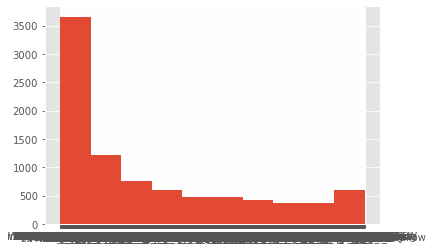

In [46]:
plt.hist(subreddit)
plt.show()

In [47]:
subdf.describe()

,score,num_comments,upvote_ratio,created
count,8936.000000,8936.000000,8936.000000,8.936000e+03
mean,2977.091204,97.841987,0.973518,1.606970e+09
std,7952.560477,472.861932,0.031650,1.778978e+04
min,74.000000,0.000000,0.640000,1.606919e+09
25%,309.000000,11.000000,0.970000,1.606956e+09
50%,735.500000,27.000000,0.980000,1.606972e+09
75%,2079.000000,72.000000,0.990000,1.606984e+09
max,124929.000000,28868.000000,1.000000,1.607003e+09


In [82]:
rf_reg = RandomForestRegressor(n_jobs=-1)

In [122]:
corpus2 = df1['title'].tolist()
X1 = vectorizer.fit_transform(corpus2)
y1 = df1['score'].tolist()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)

In [52]:
#clf.fit(X_train1, y_train1)
#clf.score(X_test1, y_test1)

0.05412371134020619

In [138]:
print(X1)

  (0, 5115)	0.5368428689092765
  (0, 1375)	0.5724312865560147
  (0, 3471)	0.6197758919747389
  (1, 2939)	0.5526080753523536
  (1, 7451)	0.5617666392633044
  (1, 5580)	0.6156643225542472
  (2, 7026)	0.46346973096775107
  (2, 1555)	0.47317933982512006
  (2, 6565)	0.5168391408157288
  (2, 5871)	0.5423784871841834
  (3, 6333)	0.7071067811865476
  (3, 6332)	0.7071067811865476
  (4, 1997)	0.5376327981956277
  (4, 703)	0.5571671589340267
  (4, 5565)	0.3884355362628177
  (4, 4318)	0.4996334311051871
  (5, 2418)	0.7650349108808335
  (5, 6866)	0.6439888082362573
  (6, 4906)	0.8182031439876432
  (6, 6867)	0.5749292262259208
  (7, 4999)	0.27003925001335893
  (7, 4326)	0.22287087516429047
  (7, 4016)	0.27003925001335893
  (7, 6521)	0.21384906826801886
  (7, 2110)	0.19344642259455722
  :	:
  (4029, 4545)	1.0
  (4030, 7619)	0.610448008877141
  (4030, 4071)	0.5724446265891203
  (4030, 2847)	0.5474124386120366
  (4031, 6292)	0.7535410731853347
  (4031, 2152)	0.6574008298007344
  (4032, 3244)	0.72394579

In [53]:
#gnb.fit(X_train1.toarray(), y_train1)
#gnb.score(X_test1.toarray(), y_test1)

In [123]:
rf_reg.fit(X_train1, y_train1)
rf_reg.score(X_test1, y_test1)

-0.10331357342099379

In [124]:
rfpred = rf_reg.predict(X_test1)

In [125]:
len(rfpred)

1010

In [126]:
len(y_test1)

1010

In [127]:
residual = rfpred - y_test1

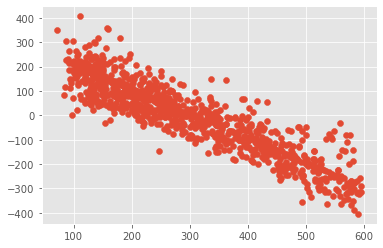

In [154]:
plt.scatter(y_test1, residual)

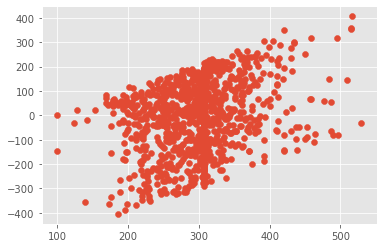

In [155]:
plt.scatter(rfpred, residual)

In [128]:
cross_val_score(rf_reg, X1, y1).mean()

-0.21014043181398284

In [129]:
imp = rf_reg.feature_importances_

In [130]:
bow = vectorizer.get_feature_names()

In [131]:
imp

array([3.70108579e-05, 9.97243264e-05, 8.78379435e-06, ...,
       3.36627653e-07, 1.32135079e-05, 3.98489121e-06])

In [132]:
type(imp)

numpy.ndarray

In [137]:
len(bow)

7708

In [134]:
X_test.toarray().shape

(494, 5214)

In [135]:
len(y_test)

494

In [140]:
#r = permutation_importance(rf_reg, X_test1.toarray(), y_test1, n_repeats=30, random_state=0)
#for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#        print(f"{bow[i]:<8}"
#              f"{r.importances_mean[i]:.3f}"
#              f" +/- {r.importances_std[i]:.3f}")

In [143]:
rf_reg.feature_importances_

array([3.70108579e-05, 9.97243264e-05, 8.78379435e-06, ...,
       3.36627653e-07, 1.32135079e-05, 3.98489121e-06])

In [145]:
an = np.array([9, 7, 8])

In [162]:
an.argsort()[::-1]

array([0, 2, 1])

In [164]:
#smallest to largest sort
an.argsort()

array([1, 2, 0])

In [169]:
imp.argsort()[::-1]

array([2113, 4503, 4028, ..., 1806, 6657, 2628])

In [153]:
type(bow)
#np array maybe

list

In [170]:
bow[2113]

'dog'

In [167]:
#bag of words from most important feature to least
bws = []
for word in imp.argsort()[::-1]:
    bws.append(bow[word])

In [168]:
bws

['dog',
 'moment',
 'like',
 'start',
 'got',
 'time',
 'post',
 'best',
 'classic',
 'just',
 'straight',
 'play',
 'gone',
 'vid',
 'repost',
 'hard',
 'tf_irl',
 'im',
 'know',
 'better',
 'fun',
 'oc',
 'tiny',
 'lets',
 'based',
 'twitter',
 'don',
 'memes',
 'sexy',
 'women',
 'guys',
 'check',
 'general',
 'teen',
 'think',
 'white',
 'sub',
 'girl',
 'respect',
 'meme',
 'uses',
 'oh',
 'release',
 'view',
 'tonight',
 'pog',
 'shlong',
 'undefeated',
 'day',
 'choose',
 'nostalgia',
 'beautiful',
 'new',
 'game',
 'cute',
 'jesus',
 'really',
 'water',
 'candy',
 'mode',
 'live',
 'comments',
 'people',
 'make',
 'kill',
 'season',
 've',
 'bad',
 'high',
 'billion',
 'knew',
 'trump',
 'za',
 'said',
 'love',
 'poster',
 'room',
 'club',
 'beach',
 'elf',
 'proving',
 'hey',
 'breakdown',
 'maps',
 'real',
 'chair',
 'dark',
 'control',
 'pretty',
 'big',
 'way',
 'changed',
 'tits',
 'hi',
 'filled',
 'epic',
 'loud',
 'aew',
 'feelin',
 'want',
 'sadly',
 'drum',
 'sucks',
